In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('./train.csv')

In [9]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [11]:
data.shape

(1460, 81)

In [12]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
data.isna().sum()/len(data)*100

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [15]:
print(data.isna().sum()/len(data)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [16]:
tmp_na = data.isna().sum()/len(data)*100

In [17]:
drop_columns = tmp_na[tmp_na>50].index.tolist()

In [18]:
drop_columns

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
data.drop(columns=drop_columns, inplace=True)

In [20]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [21]:
datana=data.isna().sum()
datana

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [22]:
datana=datana[datana>0]
len(datana[datana>0].index.tolist())

14

In [23]:
na_cols = data.isna().any()[data.isna().any()==True].index.tolist()

In [24]:
na_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [25]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [26]:
data[na_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   FireplaceQu   770 non-null    object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [27]:
data["LotFrontage"].median()

69.0

In [28]:
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)

<ipython-input-28-e0b0d58472f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)


In [29]:
data["LotFrontage"].isna().sum()

0

In [30]:
data["MasVnrArea"].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


<Axes: >

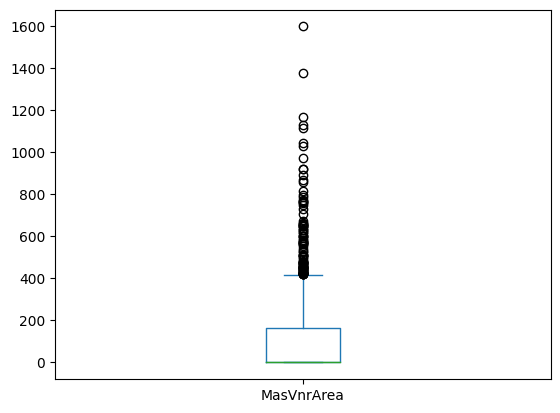

In [31]:
data["MasVnrArea"].plot.box()

In [32]:
data["MasVnrArea"].fillna(0, inplace=True)

In [33]:
data["MasVnrArea"].isna().sum()

0

In [34]:
data["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [35]:
data["BsmtQual"].value_counts()

,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


In [36]:
data["BsmtQual"].mode()

,BsmtQual
0,TA


In [37]:
data["BsmtQual"].fillna(method='ffill', inplace=True)

<ipython-input-37-79b019becdb7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["BsmtQual"].fillna(method='ffill', inplace=True)
<ipython-input-37-79b019becdb7>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["BsmtQual"].fillna(method='ffill', inplace=True)


In [38]:
data["BsmtQual"].ffill(inplace=True)

In [39]:
data["BsmtQual"].isna().sum()

0

In [40]:
quartiles = pd.qcut(data["YearBuilt"], q=4, labels = ["Po", "Fa", "TA", "Gd"])
quartiles

,YearBuilt
0,Gd
1,TA
2,Gd
3,Po
4,TA
...,...
1455,TA
1456,TA
1457,Po
1458,Po


In [41]:
data["BsmtCond"].fillna(quartiles, inplace = True)

<ipython-input-41-0948308b155d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["BsmtCond"].fillna(quartiles, inplace = True)


In [42]:
data["BsmtCond"].isna().sum()

0

In [43]:
data.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [44]:
data.BsmtCond.value_counts()

,count
BsmtCond,
TA,1317
Gd,66
Fa,57
Po,20


In [45]:
data.drop('FireplaceQu', axis=1, inplace=True)

In [46]:
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

<ipython-input-46-012284c3bafd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


In [47]:
data['Electrical'].value_counts

<bound method IndexOpsMixin.value_counts of 0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object>

In [48]:
data.dropna(axis=0, inplace=True)

In [49]:
data.shape

(1347, 75)

In [50]:
data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1347 rows x 75 columns]>

In [51]:
cat_columns = [col for col in data.columns if data[col].dtype=='object']
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [52]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [53]:
import matplotlib.pyplot as plt
import plotly.express as px
corr_matrice = data.corr(numeric_only=True)
fig = px.histogram(corr_matrice)
fig.show()

In [54]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
for col in cat_columns :
    data[col+'_le'] = le.fit_transform(data[col])


In [57]:
data.iloc[:, -20]

,ExterCond_le
0,3
1,3
2,3
3,3
4,3
...,...
1455,3
1456,3
1457,2
1458,3


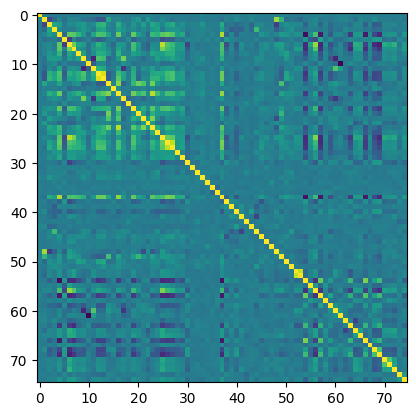

In [58]:
corr_mat = data.corr(numeric_only=True)
plt.figure()
plt.imshow(corr_mat)
plt.show()

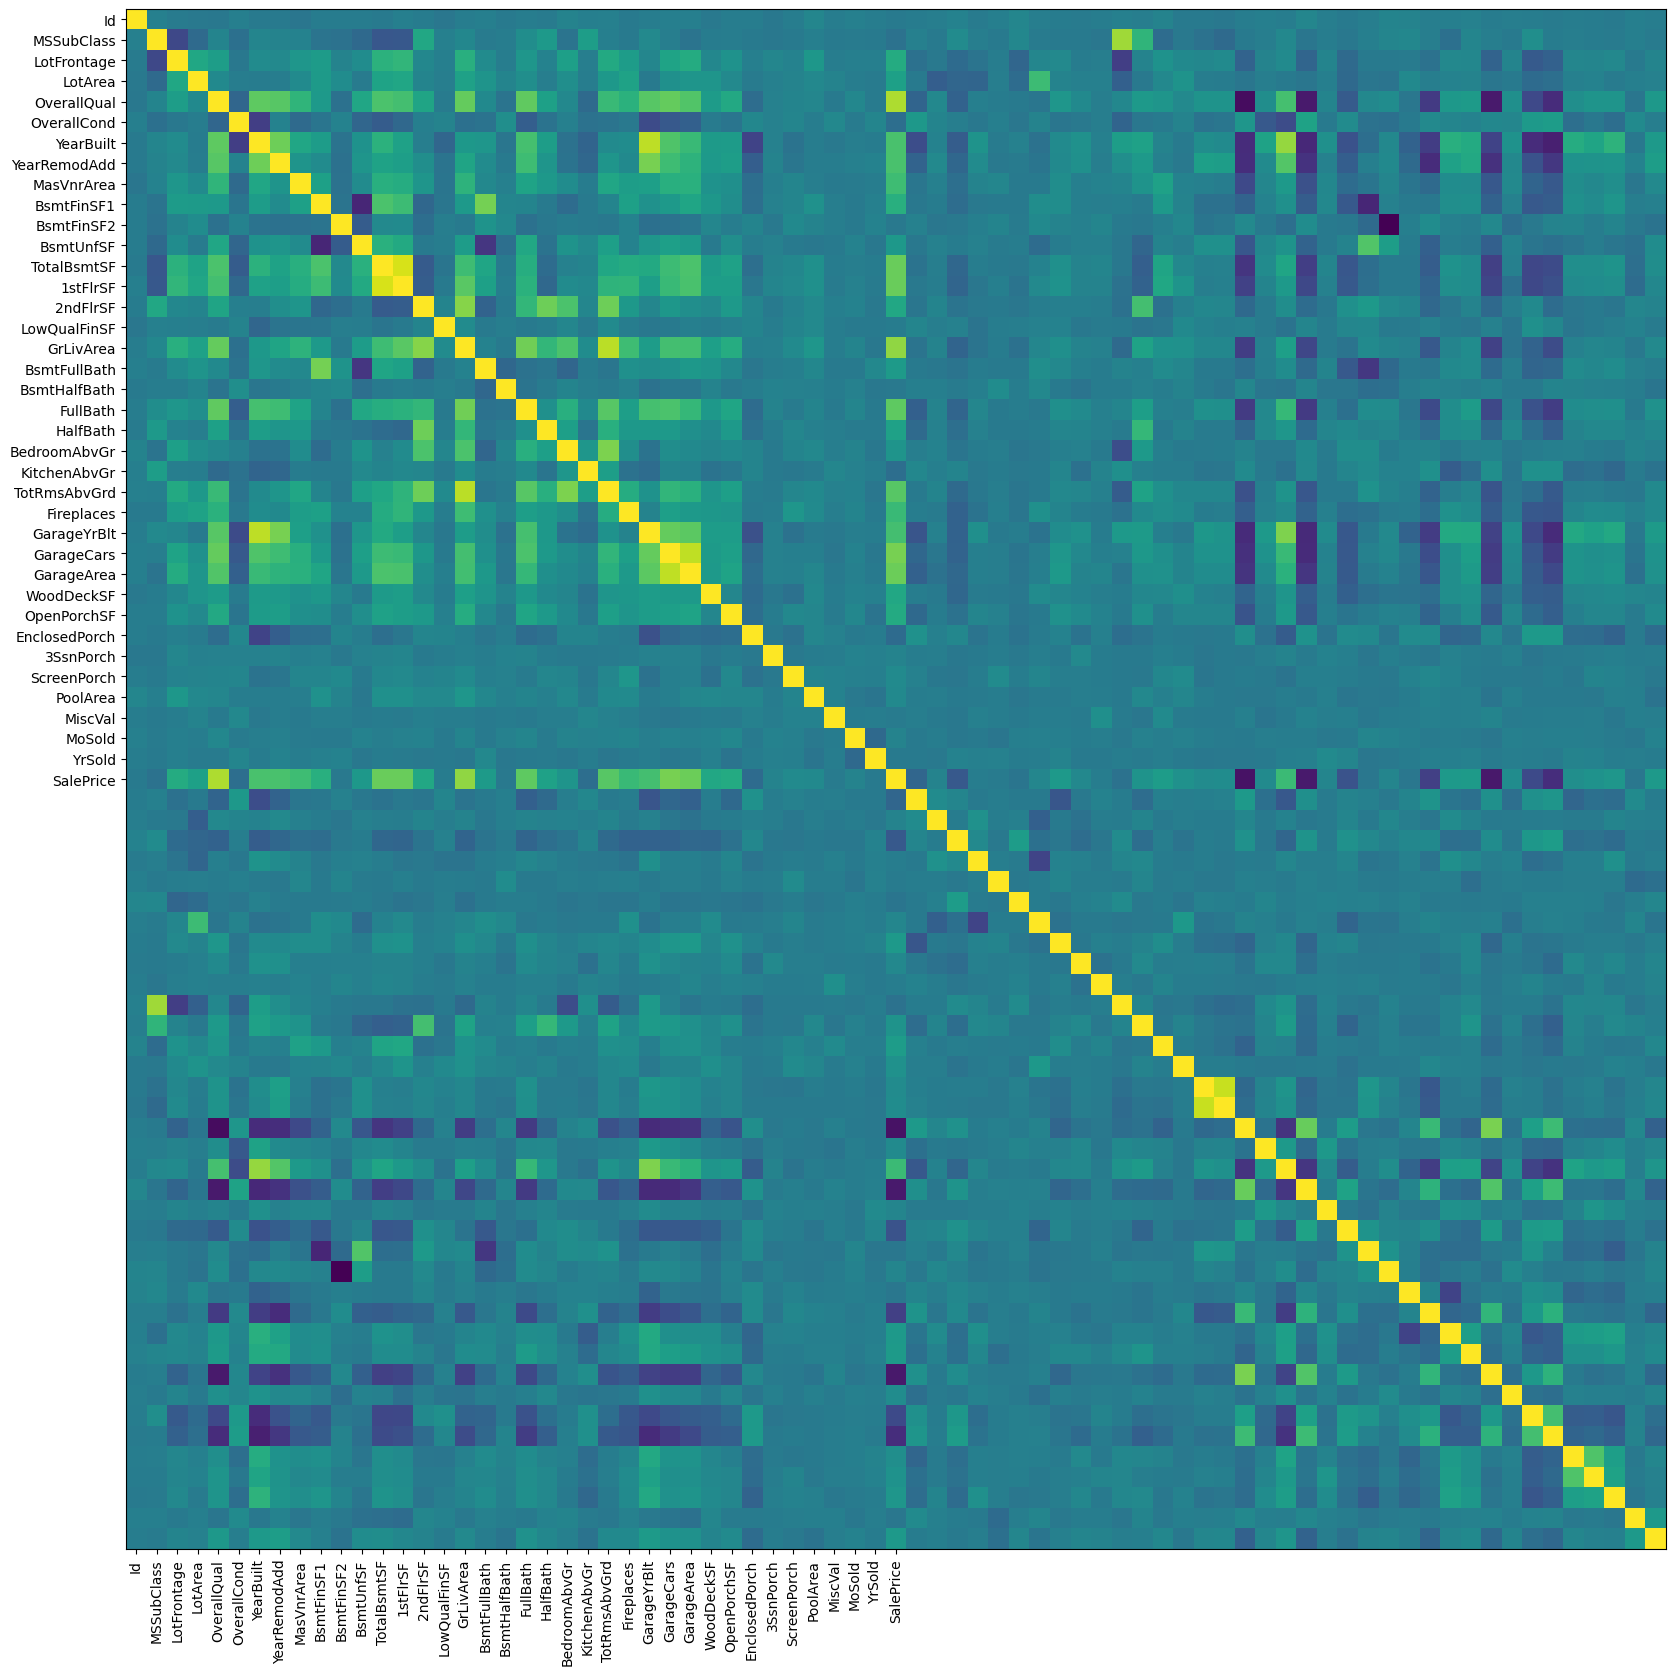

In [59]:
corr_mat_num = data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
plt.imshow(corr_mat_num)
plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=90)
plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
plt.show()

In [60]:
corr_scores = corr_mat['SalePrice']
corr_variable = corr_scores[(corr_scores >= 0.5) | (corr_scores <= -0.5)]
corr_variable

,SalePrice
OverallQual,0.784499
YearBuilt,0.503686
YearRemodAdd,0.500745
TotalBsmtSF,0.602232
1stFlrSF,0.603425
GrLivArea,0.710031
FullBath,0.566750
TotRmsAbvGrd,0.548819
GarageCars,0.641048
GarageArea,0.608755


In [61]:
oh_cols = [ele.replace('_le', '') for ele in corr_variable.index if ele.endswith('_le')]
signif_val = data[oh_cols[0]]
signif_val

,ExterQual
0,Gd
1,TA
2,Gd
3,TA
4,Gd
...,...
1455,TA
1456,TA
1457,Ex
1458,TA


In [62]:
for col in oh_cols :
    data = pd.concat([
        data,
        pd.get_dummies(data[col], dtype='int', prefix=col+'_')
    ], axis=1)

In [63]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__TA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,0,0,0,1,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0


In [64]:
Y = data['SalePrice']
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [65]:
quant_vals = corr_variable.index[:10].tolist()
quant_vals

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [66]:
#X = [col for col in data.columns if data[col].dtype != 'SalePrice']
cat_vals = [[ele for ele in data.columns if ele.startswith(col+'__')] for col in oh_cols]
cat_vals

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [67]:
cat_vals = np.concatenate([ele for ele in cat_vals]).tolist()
cat_vals

['ExterQual__Ex',
 'ExterQual__Fa',
 'ExterQual__Gd',
 'ExterQual__TA',
 'BsmtQual__Ex',
 'BsmtQual__Fa',
 'BsmtQual__Gd',
 'BsmtQual__TA',
 'KitchenQual__Ex',
 'KitchenQual__Fa',
 'KitchenQual__Gd',
 'KitchenQual__TA',
 'GarageFinish__Fin',
 'GarageFinish__RFn',
 'GarageFinish__Unf']

In [68]:
input_cols = cat_vals + quant_vals
input_cols

['ExterQual__Ex',
 'ExterQual__Fa',
 'ExterQual__Gd',
 'ExterQual__TA',
 'BsmtQual__Ex',
 'BsmtQual__Fa',
 'BsmtQual__Gd',
 'BsmtQual__TA',
 'KitchenQual__Ex',
 'KitchenQual__Fa',
 'KitchenQual__Gd',
 'KitchenQual__TA',
 'GarageFinish__Fin',
 'GarageFinish__RFn',
 'GarageFinish__Unf',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [69]:
X = data[input_cols].values
y = data['SalePrice'].values

In [70]:
X.shape, y.shape

((1347, 25), (1347,))

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train : ", X_train.shape, "\n")
print("y_train : ", y_train.shape, "\n")
print("X_test : ", X_test.shape, "\n")
print("y_test : ", y_test.shape, "\n")


X_train :  (942, 25) 

y_train :  (942,) 

X_test :  (405, 25) 

y_test :  (405,) 



In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


0.8093641035228751

In [73]:
reg.coef_

array([ 3.52010542e+04, -2.70418613e+04, -1.99012363e+03, -6.16906923e+03,
        2.69290318e+04, -1.37207000e+04, -7.38724251e+03, -5.82108926e+03,
        2.54134851e+04, -1.32364401e+04, -7.93116795e+02, -1.13839281e+04,
        3.10982641e+03,  1.25121681e+03, -4.36104322e+03,  1.30652875e+04,
        1.90465787e+02,  9.17979145e+01,  2.47960677e+00,  1.75616734e+01,
        5.24199408e+01, -2.94822016e+03, -1.01489782e+03,  1.49990867e+04,
        2.60886624e+00])

In [74]:
#y_predir = reg.predict(X_test)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score, mean_absolute_error

In [75]:
def classifieur(X_train, Y_train,X_test,Y_test):
    DT=DecisionTreeClassifier(random_state=1)
    DT.fit(X_train,Y_train)
    YDT=DT.predict(X_test)
    print(confusion_matrix(Y_test,YDT))
    print("Accuracy égale à : {0:.3f}".format(accuracy_score(Y_test,YDT)))
    print("Précision égale à : {0:.3f}".format(precision_score(Y_test,YDT)))


    KNN=KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train,Y_train)
    YKNN=KNN.predict(X_test)
    print(confusion_matrix(Y_test,YKNN))
    print("Accuracy égale à : {0:.3f}".format(accuracy_score(Y_test,YKNN)))
    print("Précision égale à : {0:.3f}".format(precision_score(Y_test,YKNN)))



In [76]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [77]:
y_pred = regr.predict(X_test)
score = r2_score(y_test, y_pred)
round(score, 2)

0.63

In [78]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [79]:
models = {
    'reg_lin' : linear_model.LinearRegression(),
    'rand_for' : RandomForestRegressor(),
    'SVR' : SVR()
}

##################################################
Modele en cours :  reg_lin


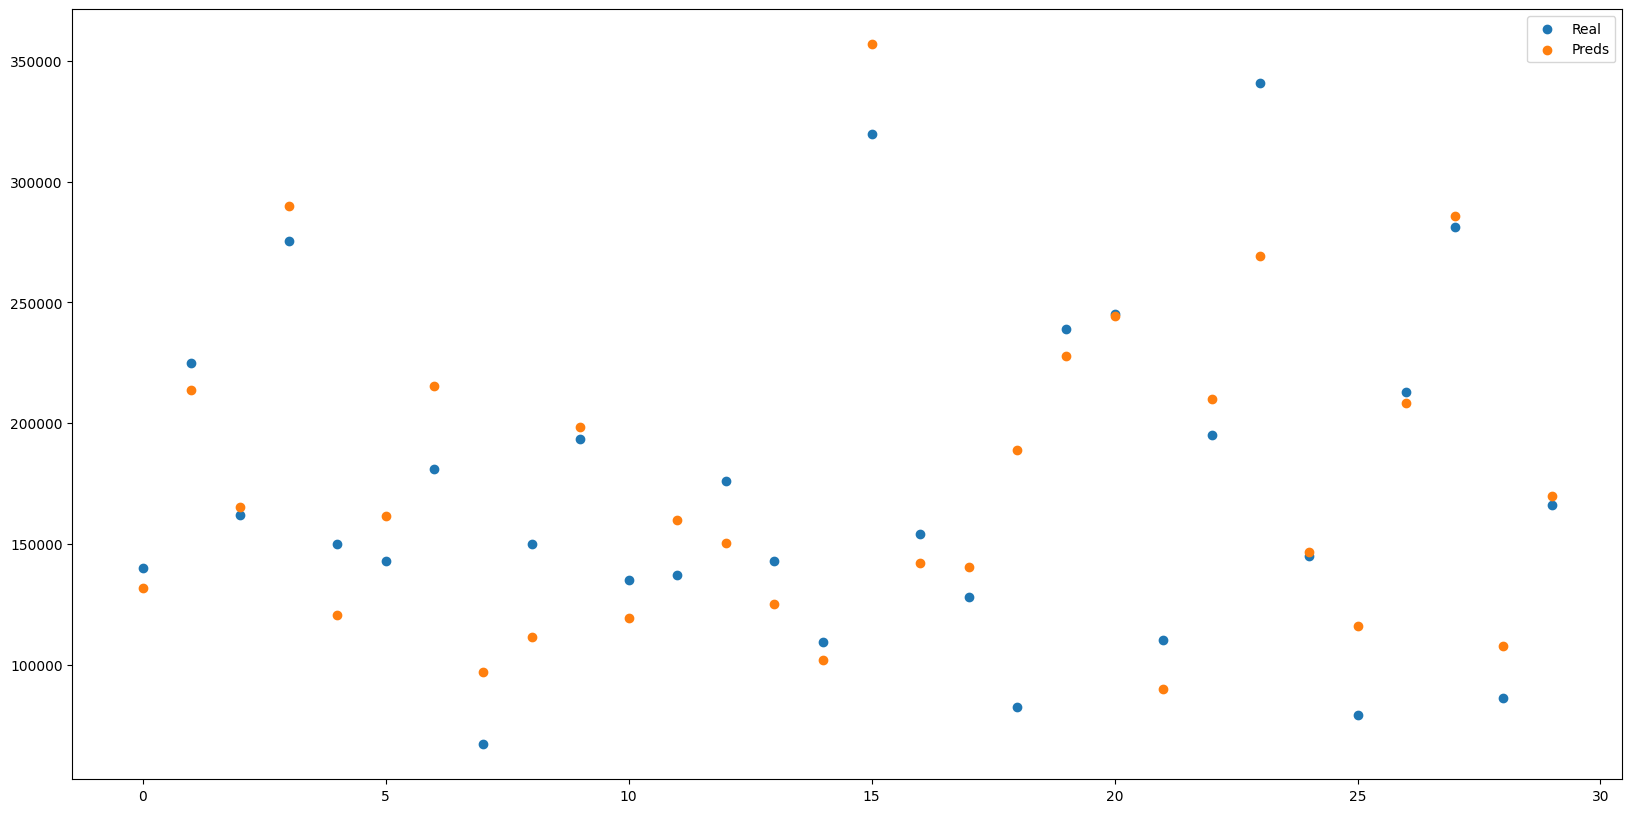

##################################################
Modele en cours :  rand_for


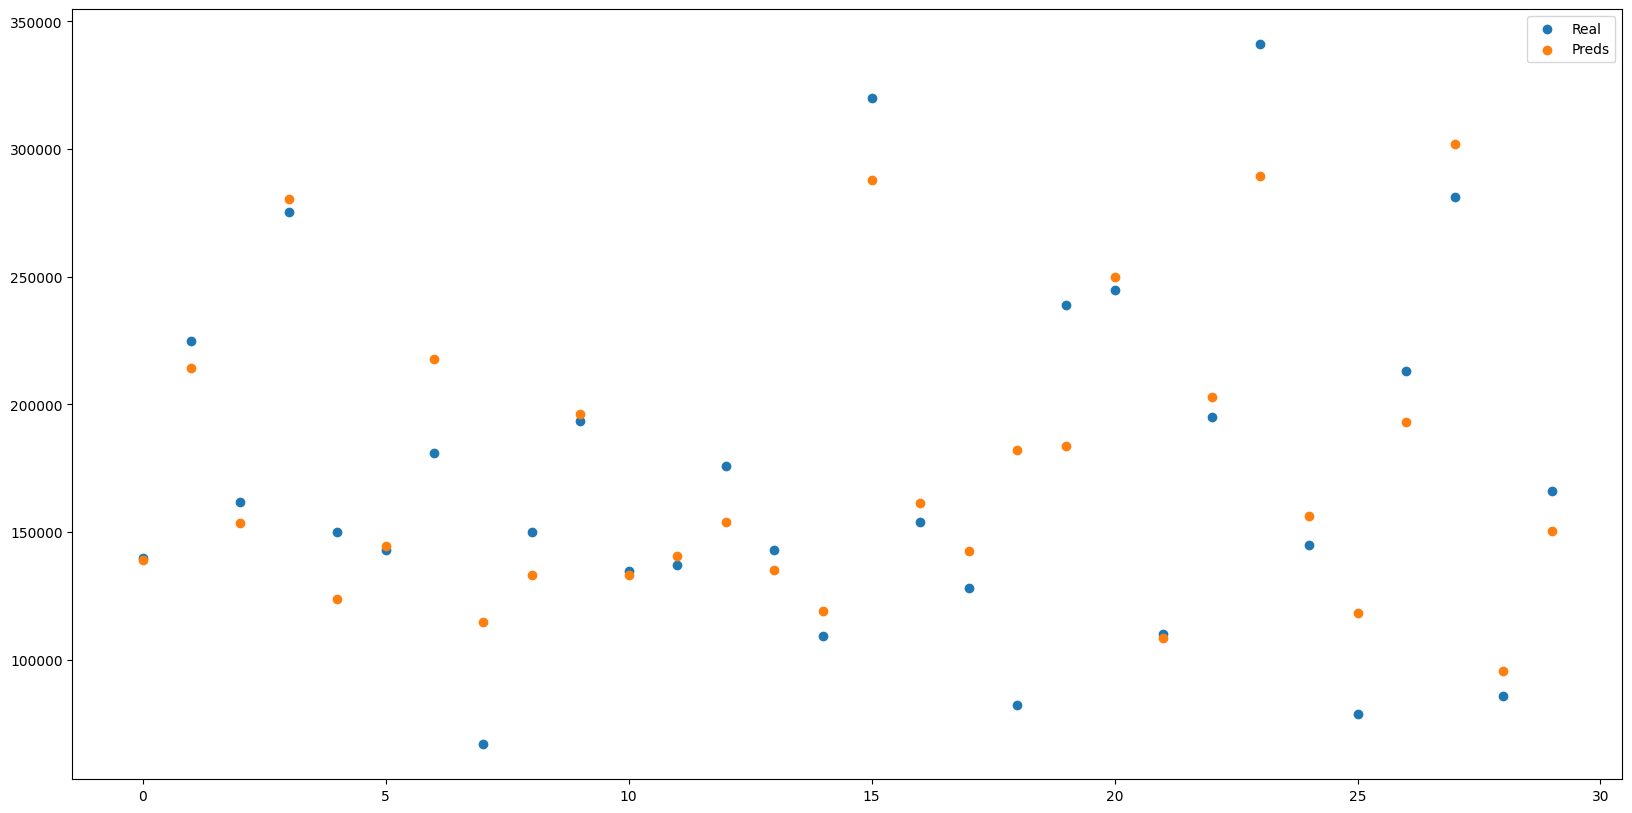

##################################################
Modele en cours :  SVR


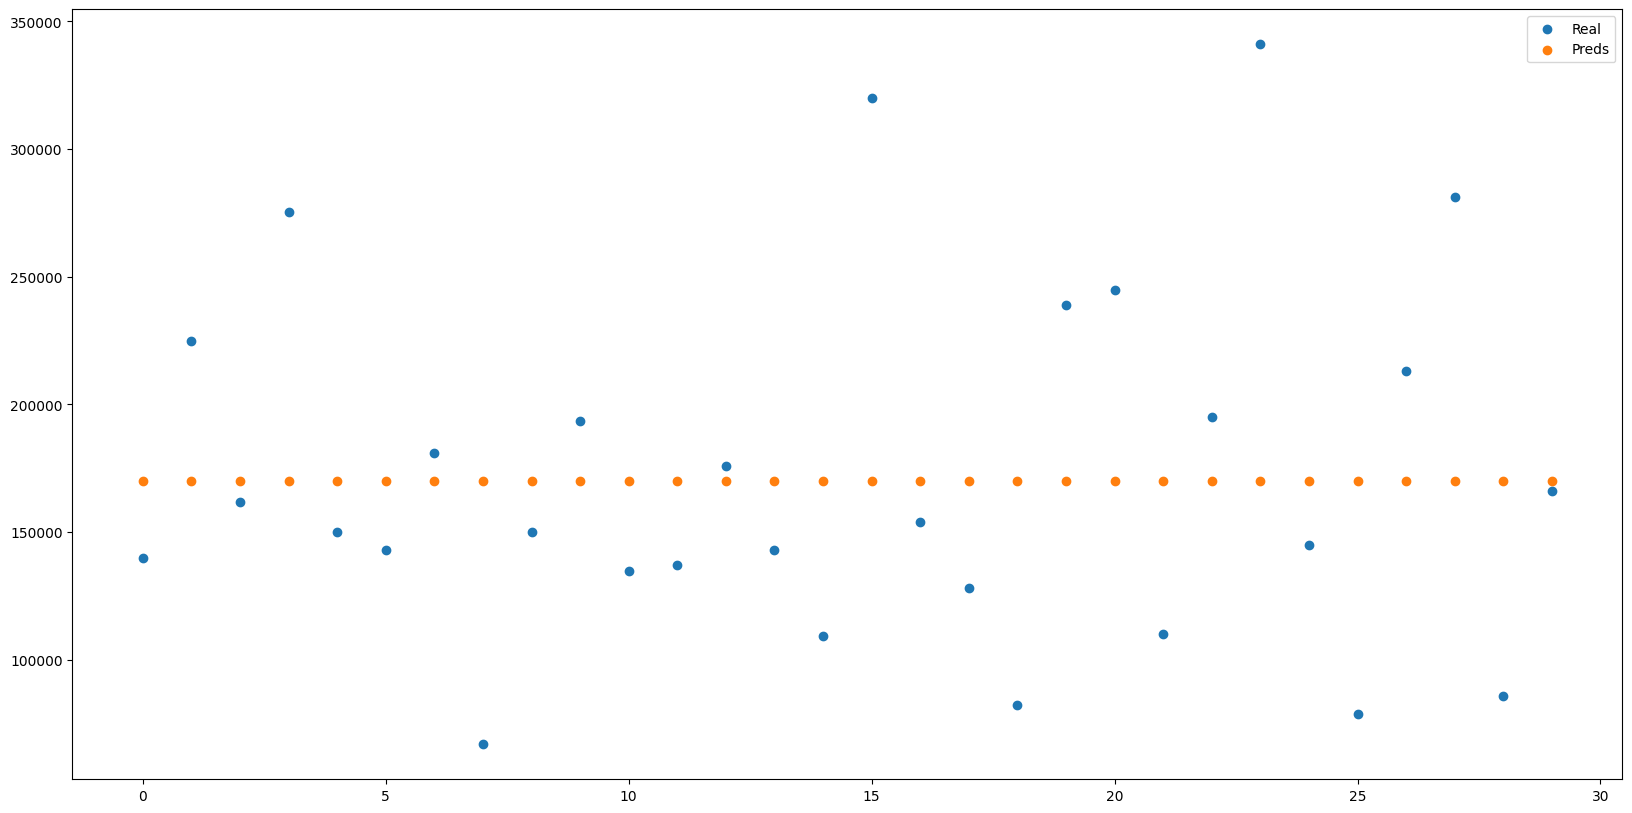

In [80]:
scores_df = pd.DataFrame()
for model_name, model in models.items() :
    print('#'*50)
    print('Modele en cours : ', model_name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    scores_df = pd.concat([
        scores_df,
        pd.DataFrame([{
            'model' : model_name,
            'R2' : r2_score(y_test, predictions),
            'MAE' : mean_absolute_error(y_test, predictions),
            'MSE' : mean_squared_error(y_test, predictions)
        }])
    ], axis=0)
    plt.figure(figsize=(20, 10))
    plt.scatter(x=range(30), y=y_test[:30], label='Real')
    plt.scatter(x=range(30), y=predictions[:30], label='Preds')
    plt.legend()
    plt.show()

In [81]:
scores_df.sort_values('R2', ascending=False)

,model,R2,MAE,MSE
0,rand_for,0.778181,19839.310614,1.247799e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,SVR,-0.035666,52800.878622,5.825947e+09


In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [83]:
research_space = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [50, 100, 200]
}

In [84]:
model = RandomForestRegressor()
grid_model = GridSearchCV(model, research_space, verbose=3)

In [85]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=50, n_estimators=50;, score=0.854 total time=   0.3s
[CV 2/5] END .....max_depth=50, n_estimators=50;, score=0.814 total time=   0.3s
[CV 3/5] END .....max_depth=50, n_estimators=50;, score=0.684 total time=   0.3s
[CV 4/5] END .....max_depth=50, n_estimators=50;, score=0.833 total time=   0.3s
[CV 5/5] END .....max_depth=50, n_estimators=50;, score=0.840 total time=   0.3s
[CV 1/5] END ....max_depth=50, n_estimators=100;, score=0.857 total time=   0.7s
[CV 2/5] END ....max_depth=50, n_estimators=100;, score=0.818 total time=   0.6s
[CV 3/5] END ....max_depth=50, n_estimators=100;, score=0.676 total time=   0.7s
[CV 4/5] END ....max_depth=50, n_estimators=100;, score=0.828 total time=   0.6s
[CV 5/5] END ....max_depth=50, n_estimators=100;, score=0.843 total time=   0.6s
[CV 1/5] END ....max_depth=50, n_estimators=150;, score=0.858 total time=   1.0s
[CV 2/5] END ....max_depth=50, n_estimators=150;

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 100, 200],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [86]:
grid_model.best_params_


{'max_depth': 50, 'n_estimators': 50}

In [87]:
grid_model.best_score_


0.8049072982356498

In [88]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=50, n_estimators=50)

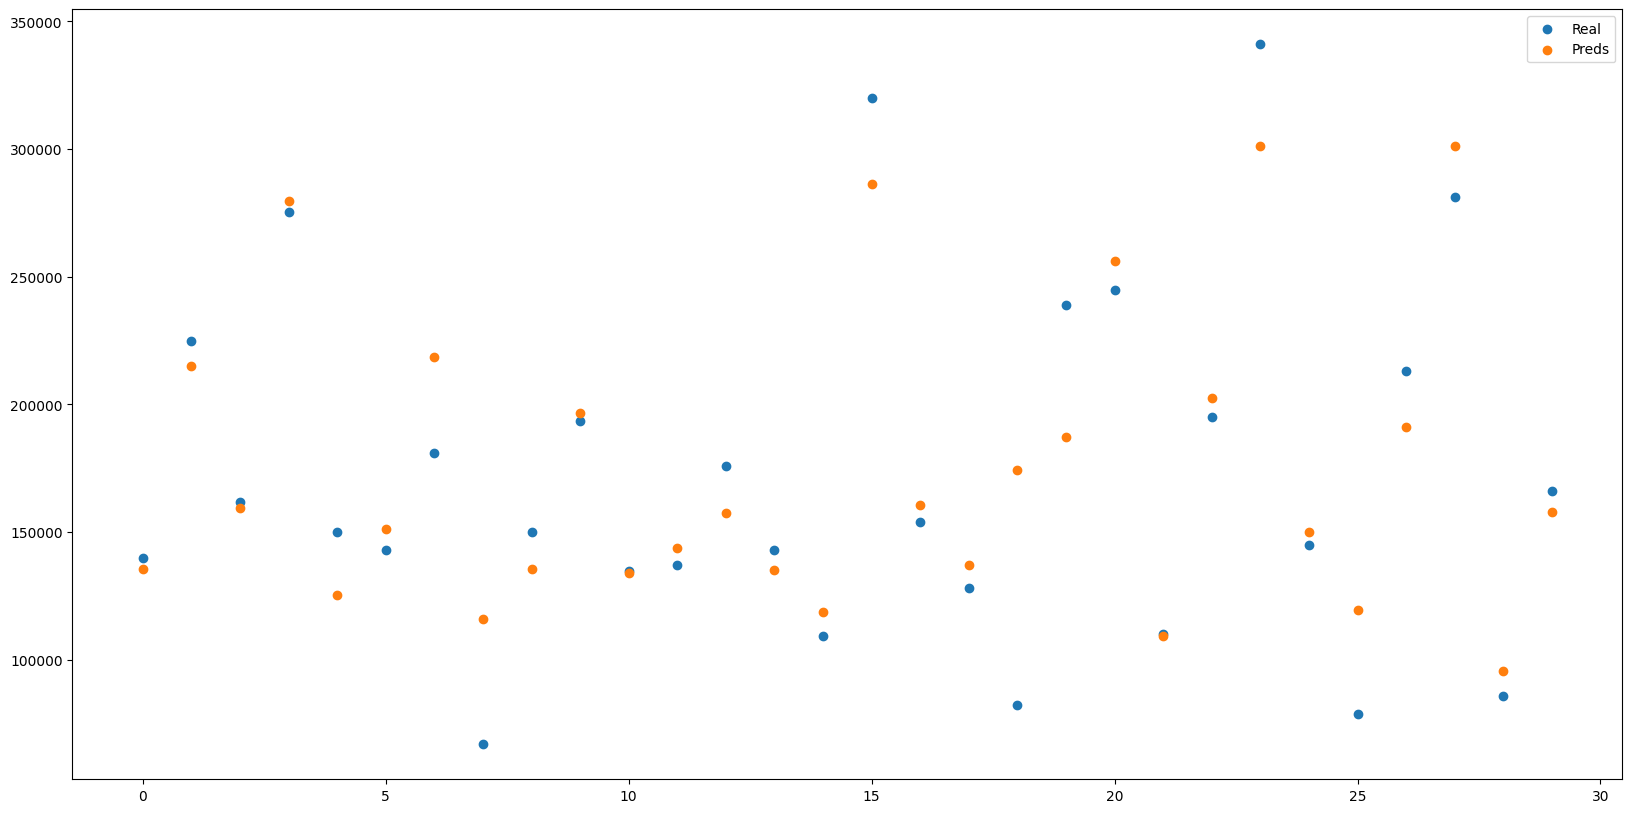

In [89]:
predictions = grid_model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        'model' : model_name,
        'R2' : r2_score(y_test, predictions),
        'MAE' : mean_absolute_error(y_test, predictions),
        'MSE' : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()

In [90]:
scores_df.sort_values('R2', ascending=False)

,model,R2,MAE,MSE
0,SVR,0.781243,19936.830434,1.230576e+09
0,rand_for,0.778181,19839.310614,1.247799e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,SVR,-0.035666,52800.878622,5.825947e+09


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....max_depth=50, n_estimators=200;, score=0.854 total time=   1.3s
[CV 2/5] END ....max_depth=50, n_estimators=200;, score=0.815 total time=   1.3s
[CV 3/5] END ....max_depth=50, n_estimators=200;, score=0.653 total time=   1.3s
[CV 4/5] END ....max_depth=50, n_estimators=200;, score=0.835 total time=   1.3s
[CV 5/5] END ....max_depth=50, n_estimators=200;, score=0.845 total time=   1.3s
[CV 1/5] END ....max_depth=200, n_estimators=50;, score=0.846 total time=   0.3s
[CV 2/5] END ....max_depth=200, n_estimators=50;, score=0.796 total time=   0.6s
[CV 3/5] END ....max_depth=200, n_estimators=50;, score=0.674 total time=   0.7s
[CV 4/5] END ....max_depth=200, n_estimators=50;, score=0.828 total time=   0.6s
[CV 5/5] END ....max_depth=200, n_estimators=50;, score=0.841 total time=   0.6s
[CV 1/5] END ...max_depth=100, n_estimators=200;, score=0.858 total time=   4.4s
[CV 2/5] END ...max_depth=100, n_estimators=200;

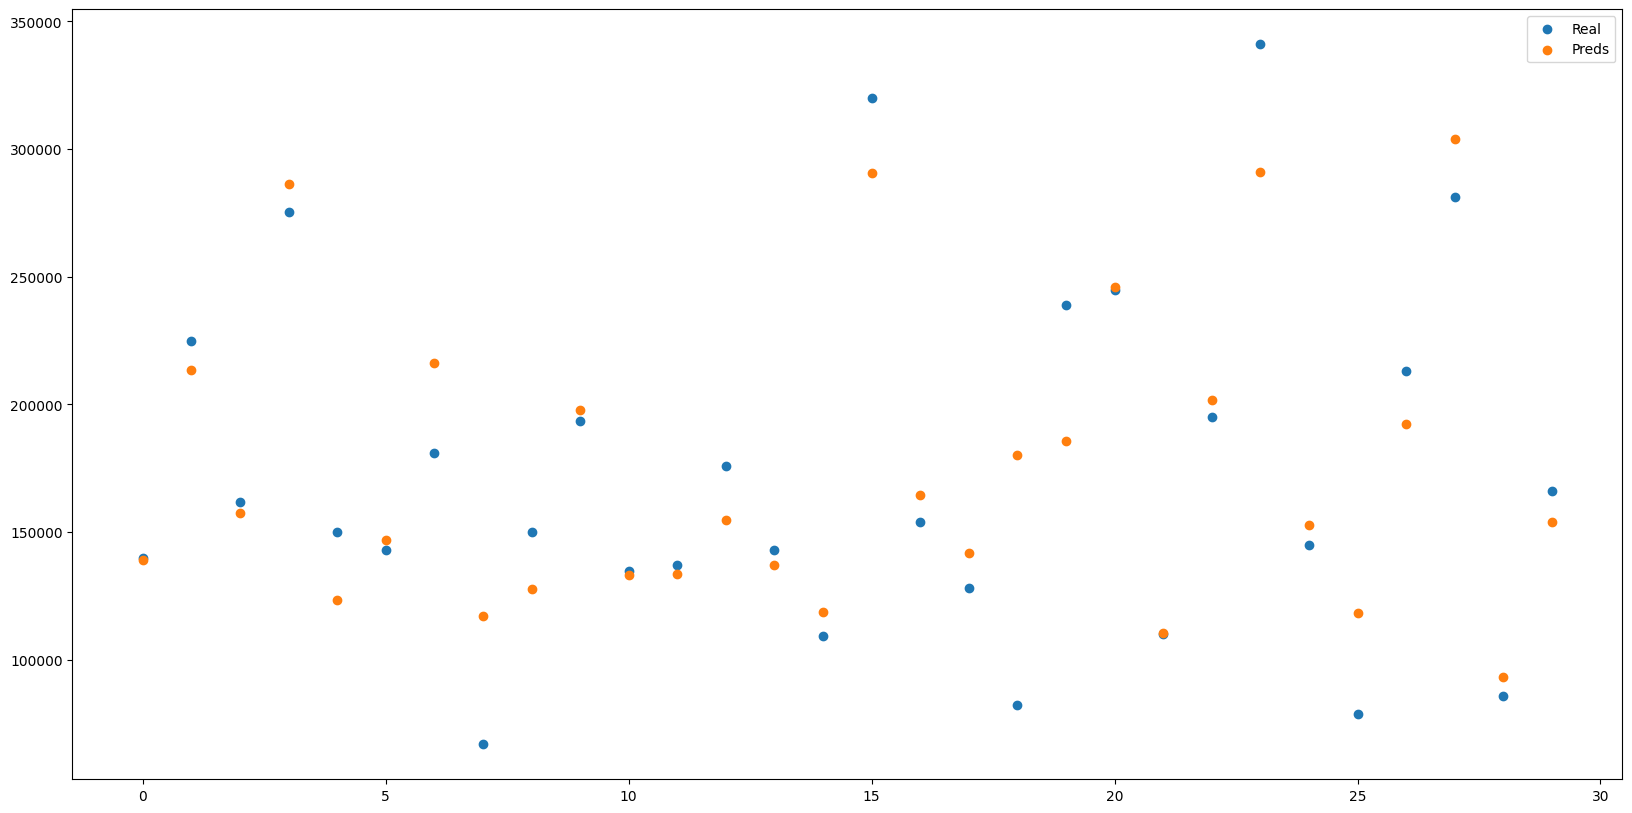

In [91]:
model = RandomForestRegressor()
grid_model = RandomizedSearchCV(model, research_space, verbose=3)
grid_model.fit(X_train, y_train)
predictions = grid_model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        'model' : model_name,
        'R2' : r2_score(y_test, predictions),
        'MAE' : mean_absolute_error(y_test, predictions),
        'MSE' : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()

In [92]:
from sklearn.neural_network import MLPRegressor

In [93]:
mlp = MLPRegressor(max_iter=500, random_state=1)

mlp.fit(X_train, y_train)

Y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² score: {r2:.2f}")

Mean Squared Error: 2140915099.32
R² score: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [94]:
import tensorflow as tf

In [100]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [99]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [113]:
import keras
from keras import layers

In [115]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [116]:
model.compile(optimizer="adam", loss="mse", metrics=["r2_score", "mae"])

In [117]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 39657488384.0000 - mae: 183739.0938 - r2_score: -6.0326
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40741326848.0000 - mae: 184205.5000 - r2_score: -4.9070
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34854068224.0000 - mae: 169577.9531 - r2_score: -4.4247
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27335245824.0000 - mae: 144506.7188 - r2_score: -2.8108
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13821359104.0000 - mae: 96454.6875 - r2_score: -1.3735 
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5720658944.0000 - mae: 50290.3008 - r2_score: 0.1140
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3617808128.0000 - mae: 40277.1133 - r2_score: 0.4475
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4313051648.0000 - mae: 45829.1328 - r2_score: 0.4592
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3593949440.0000 - mae: 41415.1

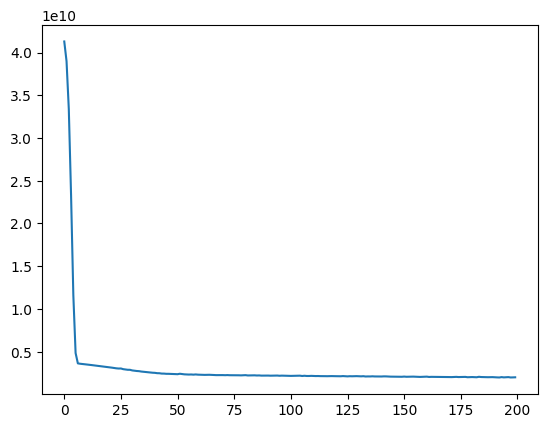

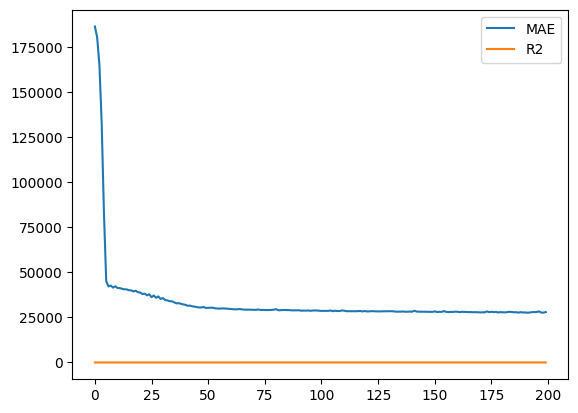

In [118]:
plt.figure()
plt.plot(history.history["loss"])
plt.show()

plt.figure()
plt.plot(history.history["mae"], label="MAE")
plt.plot(history.history["r2_score"], label="R2")
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


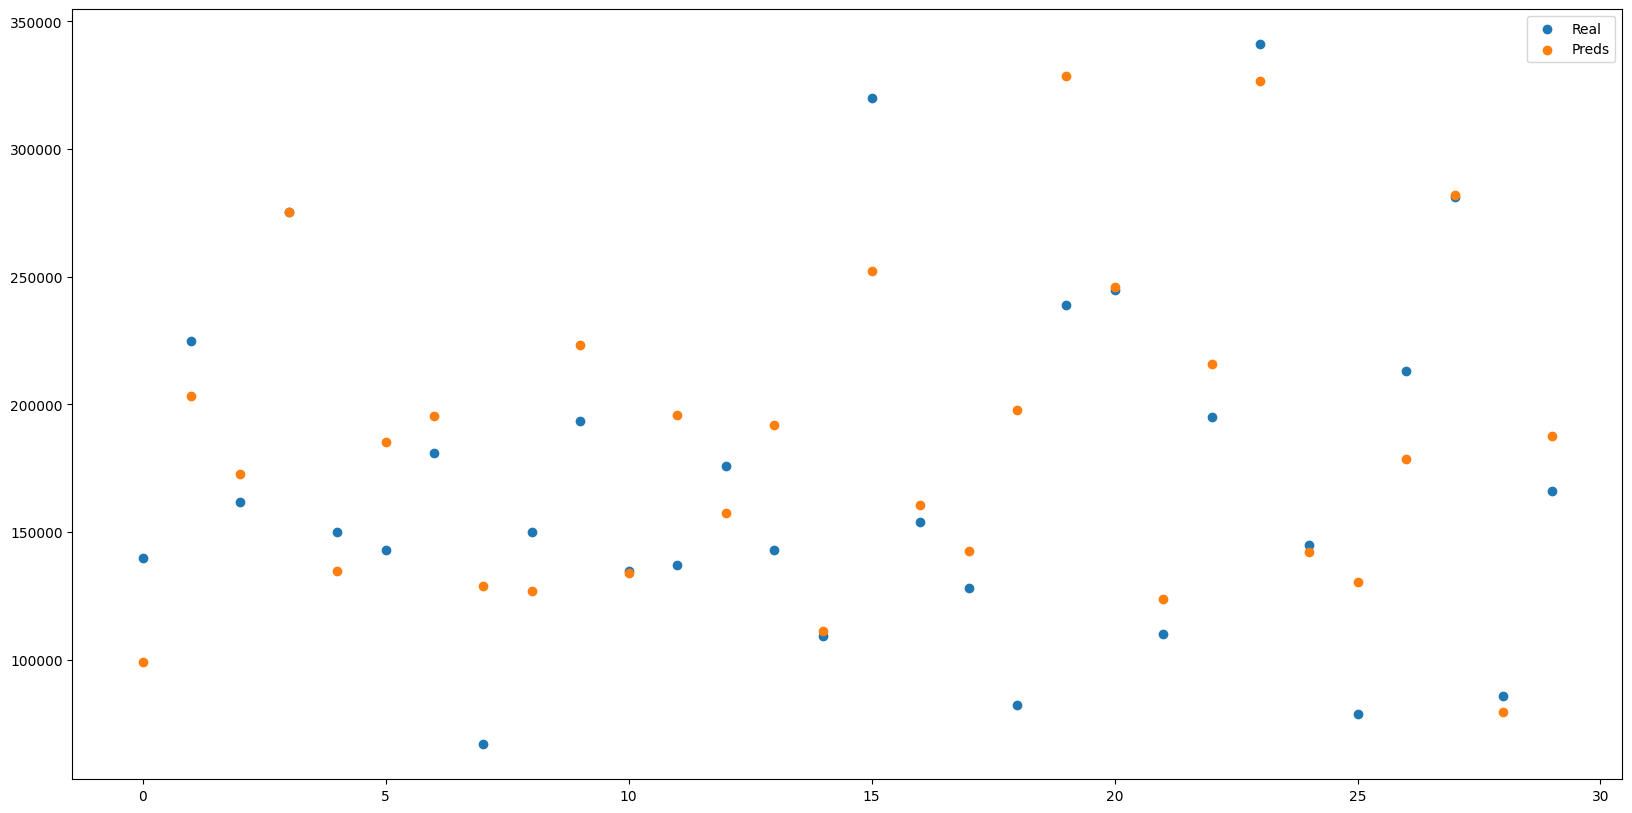

In [119]:
predictions = model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model" : "DNN_sana_act",
        "R2" : r2_score(y_test, predictions),
        "MAE" : mean_absolute_error(y_test, predictions),
        "MSE" : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()